<a href="https://colab.research.google.com/github/IbrahemElsherif/kaggle/blob/main/Customer%20Churn%20Bank%20Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [283]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (
    VotingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier
)
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from lightgbm import LGBMClassifier

from imblearn.over_sampling import SMOTE
from collections import Counter


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [148]:
# Get column info
def columns_info(df):
    cols=[]
    dtype=[]
    unique_v=[]
    n_unique_v=[]

    for col in df.columns:
        cols.append(col)
        dtype.append(df[col].dtypes)
        unique_v.append(df[col].unique())
        n_unique_v.append(df[col].nunique())

    return pd.DataFrame({'names':cols,'dtypes':dtype,'unique':unique_v,'n_unique':n_unique_v})

# Data Preprocessing

**Document after every step**

## Data Collection

Note: automate as much as possible so you can easily get fresh data.

1. List the data you need and how much you need.

2. Find and document where you can get that data.

3. Check how much space it will take.

4. Check legal obligations, and get authorization if necessary.

5. Get access authorizations.

6. Create a workspace (with enough storage space).

7. Get the data.

8. Convert the data to a format you can easily manipulate (without changing the
data itself).

9. Ensure sensitive information is deleted or protected (e.g., anonymized).

10. Check the size and type of data (time series, sample, geographical, etc.).

11. Sample a test set, put it aside, and never look at it (no data snooping!).


In [149]:
df = pd.read_csv('/content/Bank Customer Churn Prediction.csv')

## Exploratory Data Analysis (EDA)

Detecting distributions (e.g., skewness, normality).
Visualizing relationships (e.g., correlations, scatterplots).
Identifying potential feature interactions.

**Visualize**

1. Data validation
2. Data summarization (Descriptive Statistics)
3. Patterns over time
4. Correlation
5. Hypthesis testing


- Capture a list of hypotheses and questions that come up for further exploration.
- Record things to watch out for/ be aware of in future analyses.
- Feedback, domain knowledge. Don't do EDA in a bubble! Get feedback throughout especially from people removed from the problem and/or with relevant domain knowledge.
- Position visuals and results together. EDA relies on your natural pattern recognition abilities so maximize what you'll find by putting visualizations and results in close proximity.




### Data validation

In [150]:
# Create a copy of the dataset for exploration
explore_df = copy.deepcopy(df)

In [151]:
# Check the shapa and size of data
print(f'Shape of the dataset: {explore_df.shape}')
print(f'Number of rows in Datasets: {explore_df.shape[0]}')
print(f'Number of columns in Datasets: {explore_df.shape[1]}')
print(f'Size of the dataset: {explore_df.size}')


Shape of the dataset: (10000, 12)
Number of rows in Datasets: 10000
Number of columns in Datasets: 12
Size of the dataset: 120000


In [152]:
# Take a look at the data
explore_df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [153]:
# Data info
explore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [154]:
# Check data types
explore_df.dtypes

,0
customer_id,int64
credit_score,int64
country,object
gender,object
age,int64
tenure,int64
balance,float64
products_number,int64
credit_card,int64
active_member,int64


In [155]:
# Validating numerical data
explore_df.select_dtypes('number').head()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0


<Axes: xlabel='age'>

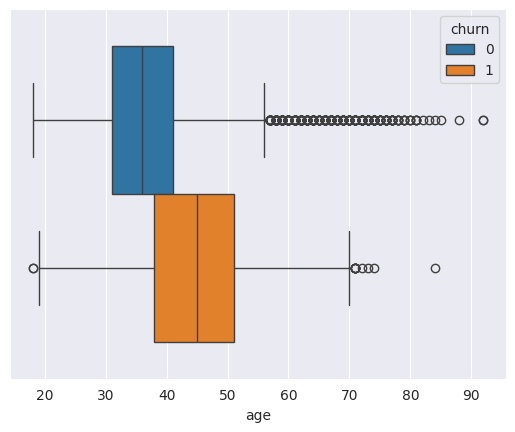

In [156]:
sns.boxplot(explore_df,x='age',hue='churn')

<Axes: xlabel='age'>

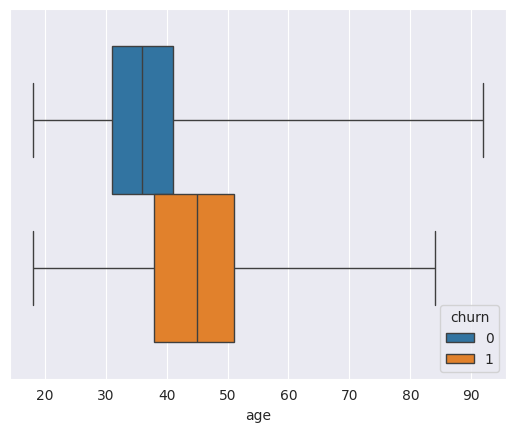

In [157]:
sns.boxplot(explore_df,x='age',hue='churn',whis=[0,100]) # with no outliers

<Axes: xlabel='balance'>

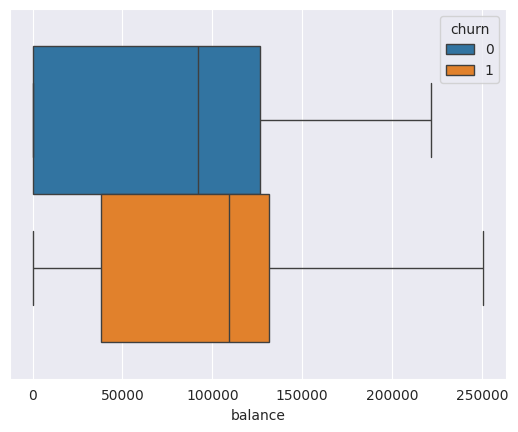

In [158]:
sns.boxplot(explore_df,x='balance',hue='churn')

<Axes: xlabel='tenure', ylabel='count'>

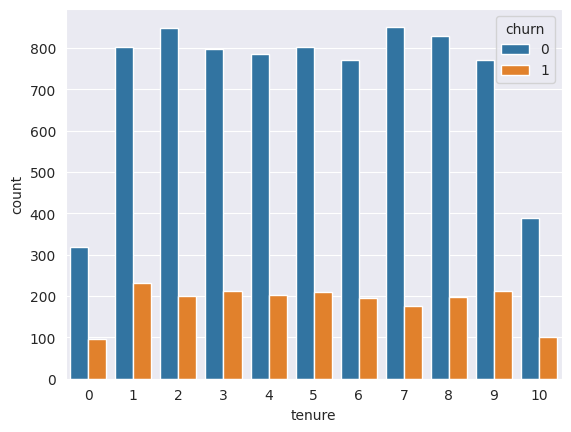

In [159]:
sns.countplot(explore_df,x='tenure',hue='churn')

<Axes: xlabel='active_member', ylabel='count'>

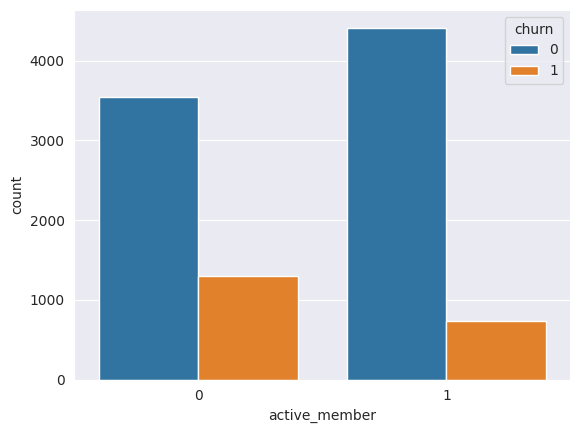

In [160]:
sns.countplot(explore_df,x='active_member',hue='churn')

<Axes: xlabel='products_number', ylabel='count'>

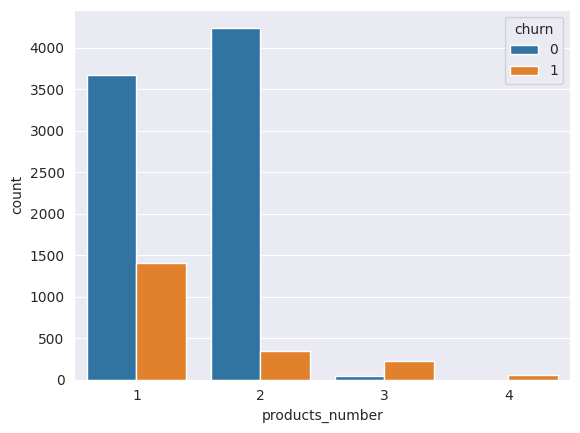

In [161]:
sns.countplot(explore_df,x='products_number',hue='churn')

<Axes: xlabel='churn', ylabel='count'>

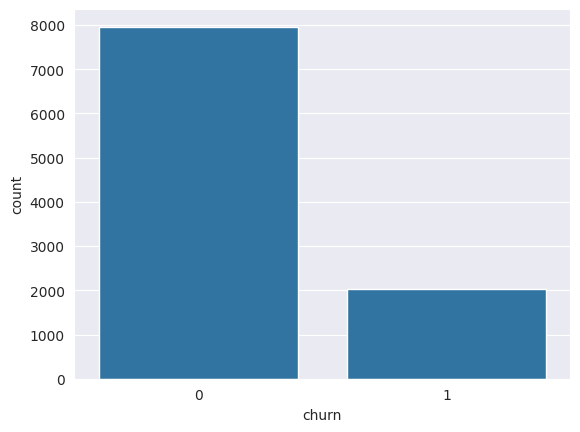

In [162]:
sns.countplot(explore_df, x= 'churn')

In [163]:
explore_df['churn'].value_counts(normalize=True)

,proportion
churn,
0,0.7963
1,0.2037


Data is imbalanced

<Axes: xlabel='churn', ylabel='Count'>

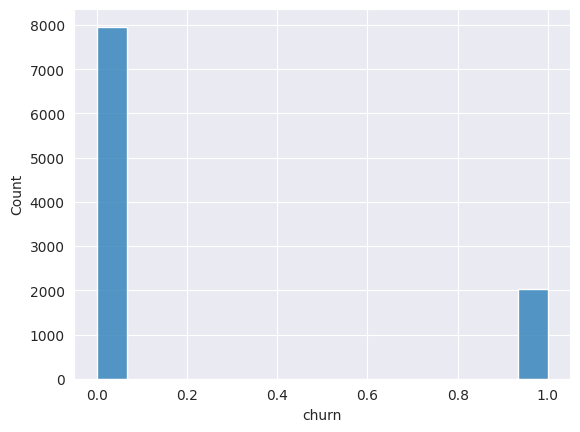

In [164]:
sns.histplot(explore_df, x='churn')

In [165]:
# Validating categorical data
explore_df.select_dtypes('object').head()

,country,gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female


In [166]:
columns_info(explore_df)

,names,dtypes,unique,n_unique
0,customer_id,int64,"[15634602, 15647311, 15619304, 15701354, 15737...",10000
1,credit_score,int64,"[619, 608, 502, 699, 850, 645, 822, 376, 501, ...",460
2,country,object,"[France, Spain, Germany]",3
3,gender,object,"[Female, Male]",2
4,age,int64,"[42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 2...",70
5,tenure,int64,"[2, 1, 8, 7, 4, 6, 3, 10, 5, 9, 0]",11
6,balance,float64,"[0.0, 83807.86, 159660.8, 125510.82, 113755.78...",6382
7,products_number,int64,"[1, 3, 2, 4]",4
8,credit_card,int64,"[1, 0]",2
9,active_member,int64,"[1, 0]",2


<Axes: xlabel='churn', ylabel='count'>

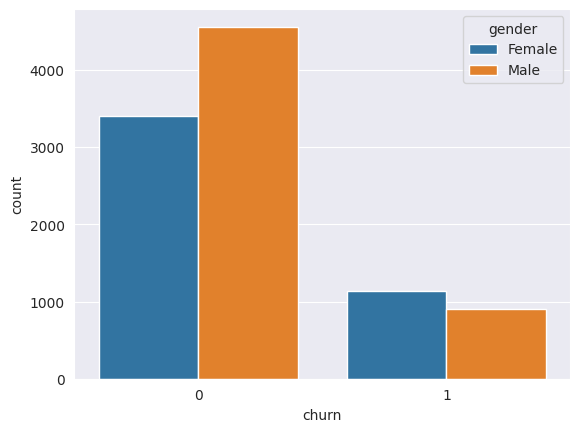

In [167]:
sns.countplot(explore_df, x= 'churn',hue='gender')

<Axes: xlabel='estimated_salary', ylabel='Count'>

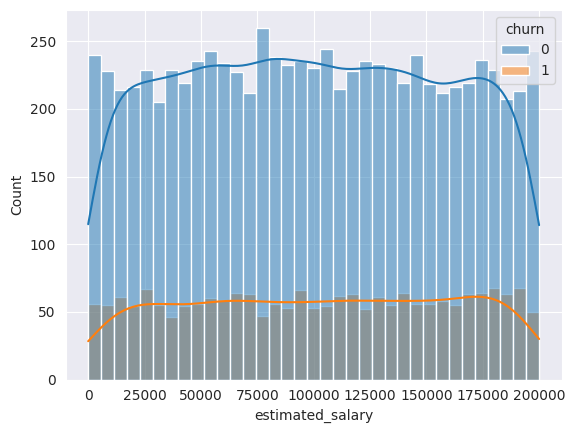

In [168]:
# Explore numerical columns
sns.histplot(explore_df,x='estimated_salary',hue='churn',bins=35,kde=True)

<Axes: xlabel='credit_score', ylabel='Count'>

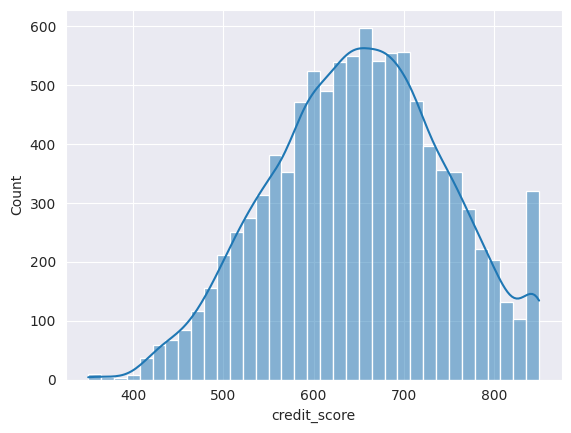

In [169]:
# Explore numerical columns
sns.histplot(explore_df,x='credit_score',bins=35,kde=True)

In [170]:
explore_df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<Axes: xlabel='balance', ylabel='Count'>

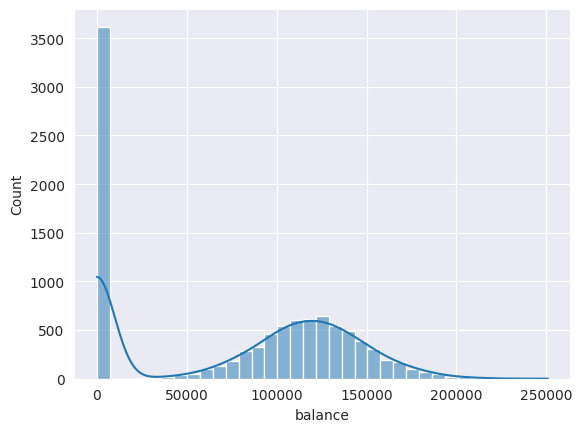

In [171]:
sns.histplot(explore_df,x='balance',bins=35,kde=True)

In [172]:
quantile_25 = explore_df['age'].quantile(0.25)
median = explore_df['age'].median()
quantile_75= explore_df['age'].quantile(0.75)
max_value = explore_df['age'].max()

In [173]:
labels=['25-35','35-45','45-55','55-65']
bins=[0,quantile_25,median,quantile_75,max_value]
explore_df['age_range'] = pd.cut(explore_df['age'],
                                labels=labels,
                                bins=bins)

In [174]:
explore_df[['age_range','age']].sample()

,age_range,age
3975,55-65,49


<Axes: xlabel='age_range', ylabel='count'>

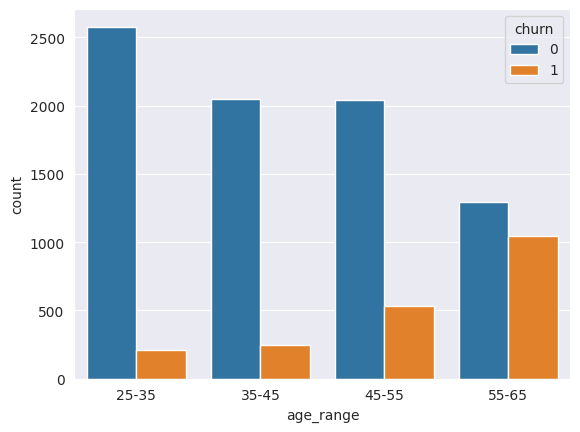

In [175]:
sns.countplot(explore_df,x='age_range',hue='churn')

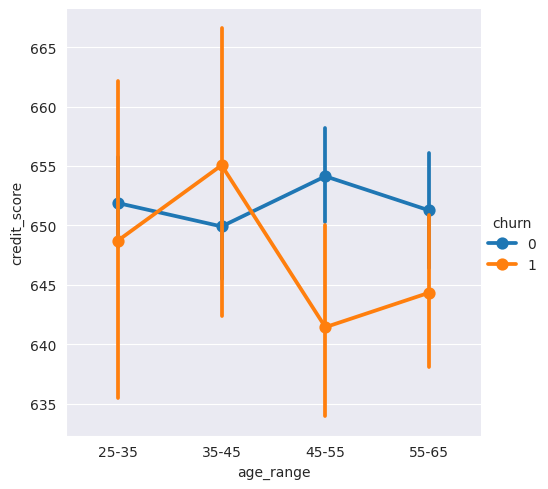

In [176]:
# Explore categorical columns
sns.catplot(explore_df,x='age_range',y='credit_score',hue='churn',kind='point')

### Data summarization

In [177]:
columns_info(explore_df)

,names,dtypes,unique,n_unique
0,customer_id,int64,"[15634602, 15647311, 15619304, 15701354, 15737...",10000
1,credit_score,int64,"[619, 608, 502, 699, 850, 645, 822, 376, 501, ...",460
2,country,object,"[France, Spain, Germany]",3
3,gender,object,"[Female, Male]",2
4,age,int64,"[42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 2...",70
5,tenure,int64,"[2, 1, 8, 7, 4, 6, 3, 10, 5, 9, 0]",11
6,balance,float64,"[0.0, 83807.86, 159660.8, 125510.82, 113755.78...",6382
7,products_number,int64,"[1, 3, 2, 4]",4
8,credit_card,int64,"[1, 0]",2
9,active_member,int64,"[1, 0]",2


In [178]:
# Describe statistics for numerical columns
explore_df.select_dtypes('number').describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [179]:
explore_df.select_dtypes('object').describe()

,country,gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


In [180]:
# Churn by Active Member
churn_by_active_member = explore_df.groupby('active_member')['churn'].mean()
print("\nChurn Rate by Active Member:\n", churn_by_active_member)



Churn Rate by Active Member:
 active_member
0    0.268509
1    0.142691
Name: churn, dtype: float64


In [181]:
# Churn by products_number
churn_by_products_number = explore_df.groupby('products_number')['churn'].mean()
print("\nChurn Rate by products number:\n", churn_by_products_number)


Churn Rate by products number:
 products_number
1    0.277144
2    0.075817
3    0.827068
4    1.000000
Name: churn, dtype: float64


As we can see the data is mostly clean

### Patterns over time

### Correlation analysis

Identify highly correlated features (e.g., using a heatmap or correlation matrix).
Examine the correlation between features and the target variable.

• Describes direction and strength of relationship between two variables
• Can help us use variables to predict future outcomes

In [182]:
explore_df.select_dtypes('number').corr()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
customer_id,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
credit_score,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
age,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
tenure,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
balance,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
products_number,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
credit_card,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
active_member,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
estimated_salary,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
churn,-0.006248,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


<Axes: >

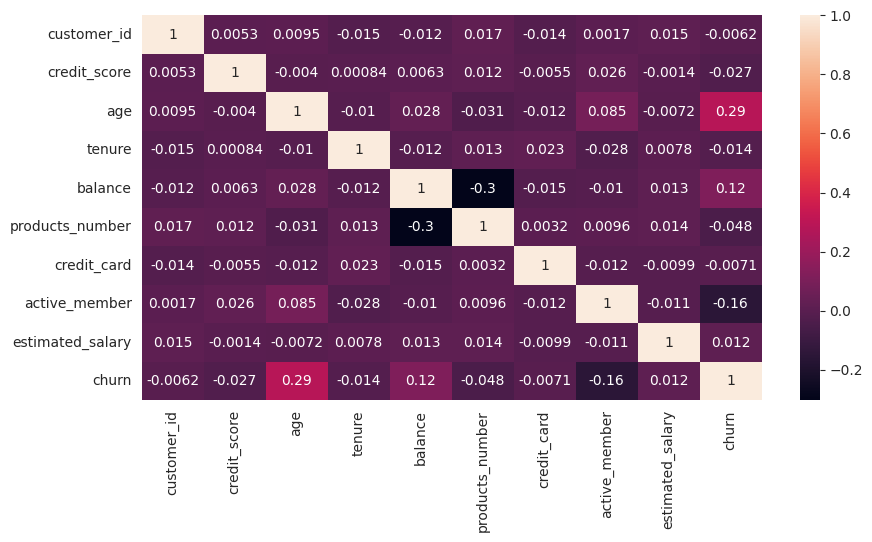

In [183]:
plt.figure(figsize=(10,5))
sns.heatmap(explore_df.select_dtypes('number').corr(),annot=True)

<Axes: xlabel='estimated_salary', ylabel='age'>

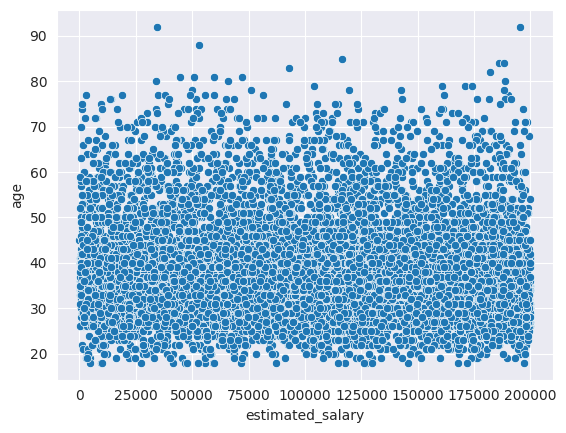

In [184]:
sns.scatterplot(explore_df,x='estimated_salary',y='age')

### Hypothesis testing

## Data Cleaning/preparation


Main steps when cleaning data
1. Identify the problematic data
2. Clean the data
3. Remove, encode, fill in any missing data
4. Remove outliers or analyze them separately
5. Purge contaminated data and correct leaking pipelines
6. Standardize inconsistent data
7. Check if your data makes sense (is valid)
8. Deduplicate multiple records of the same dataForesee and prevent type
issues (string issues, DateTime issues)
9. Remove engineering errors (aka structural errors)
10. Rinse and repeat

**Notes:**

• Work on copies of the data (keep the original dataset intact).

• Write functions for all data transformations you apply, for five reasons:

—So you can easily prepare the data the next time you get a fresh dataset

—So you can apply these transformations in future projects

—To clean and prepare the test set

—To clean and prepare new data instances once your solution is live

—To make it easy to treat your preparation choices as hyperparameters


####  MISSING DATA

0, “0”, empty strings, “Not Applicable”, “NA”, “#NA”, None, NaN, NULL
There are 3 methods


In [185]:
# missing of missing values
df.isna().sum()

,0
customer_id,0
credit_score,0
country,0
gender,0
age,0
tenure,0
balance,0
products_number,0
credit_card,0
active_member,0


#### OUTLIERS


<Axes: xlabel='age'>

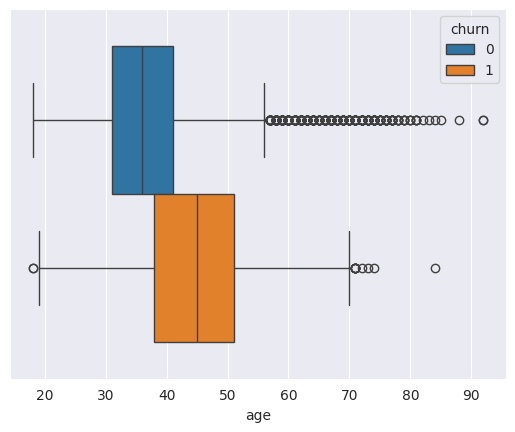

In [186]:
sns.boxplot(df,x='age',hue='churn')

In [187]:
df.shape

(10000, 12)

In [188]:
q1=df['age'].quantile(0.25)
q3=df['age'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
median_value = df['age'].median()

In [189]:
# replace outliers with median
df['age'] = df['age'].mask((df['age'] < lower_bound) | (df['age'] > upper_bound), median_value)


<Axes: xlabel='age'>

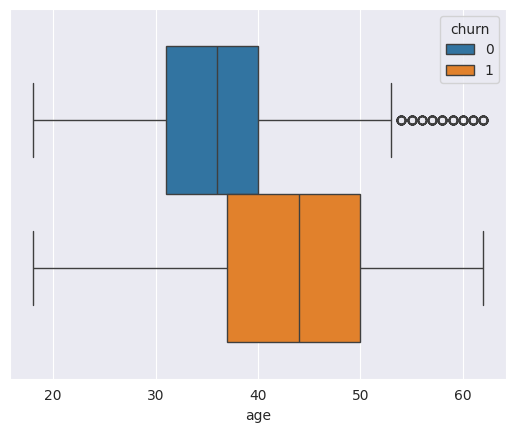

In [190]:
sns.boxplot(df,x='age',hue='churn')

In [191]:
df.shape

(10000, 12)

####  DUPLICATE DATA



In [192]:
df.duplicated().sum()

0

In [193]:
df.drop_duplicates()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


#### DATA TYPE ISSUES


In [194]:
columns_info(df)

,names,dtypes,unique,n_unique
0,customer_id,int64,"[15634602, 15647311, 15619304, 15701354, 15737...",10000
1,credit_score,int64,"[619, 608, 502, 699, 850, 645, 822, 376, 501, ...",460
2,country,object,"[France, Spain, Germany]",3
3,gender,object,"[Female, Male]",2
4,age,int64,"[42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 2...",45
5,tenure,int64,"[2, 1, 8, 7, 4, 6, 3, 10, 5, 9, 0]",11
6,balance,float64,"[0.0, 83807.86, 159660.8, 125510.82, 113755.78...",6382
7,products_number,int64,"[1, 3, 2, 4]",4
8,credit_card,int64,"[1, 0]",2
9,active_member,int64,"[1, 0]",2


## Data encoding

Convert categorical variables into numerical formats (label encoding, one-hot encoding).


In [195]:
label_encoder = LabelEncoder()
df['country'] = label_encoder.fit_transform(df['country'])
df['gender'] = label_encoder.fit_transform(df['gender'])

In [196]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0


## Data preperation


In [197]:
X = df.drop(columns='churn')
y= df['churn']

In [198]:
X.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,15634602,619,0,0,42,2,0.00,1,1,1,101348.88
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58
2,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57
3,15701354,699,0,0,39,1,0.00,2,0,0,93826.63
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10


In [199]:
y.head()

,churn
0,1
1,0
2,1
3,0
4,0


In [200]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Imbalanced data


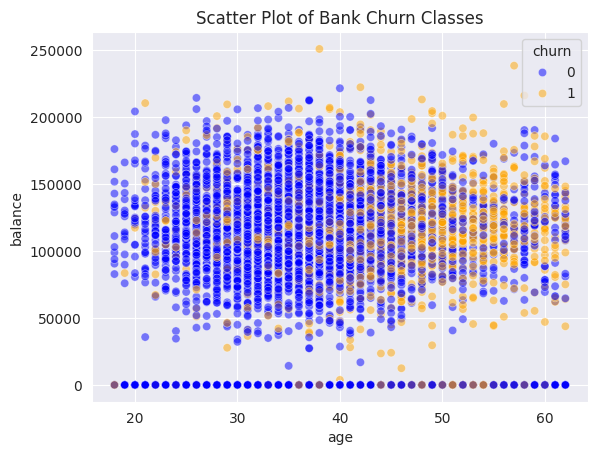

In [201]:
sns.set_style("darkgrid")
sns.scatterplot(
    data=df,
    x='age',            # Replace with your chosen feature
    y='balance',        # Replace with your chosen feature
    hue='churn',       # Target column
    palette={0: 'blue', 1: 'orange'},
    alpha=0.5
)
plt.title("Scatter Plot of Bank Churn Classes")
plt.grid(True)
plt.show()

<Axes: xlabel='churn', ylabel='count'>

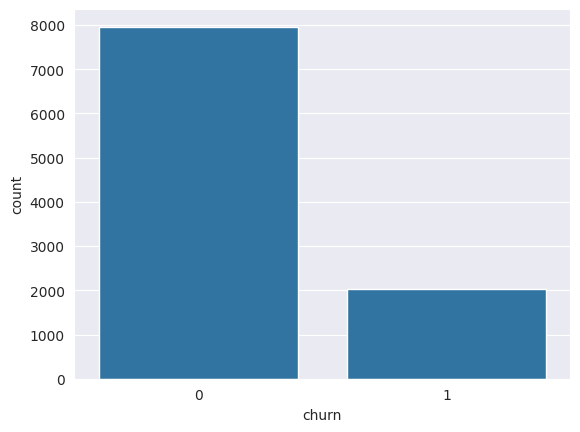

In [202]:
sns.countplot(df,x='churn')

In [203]:
print("Class Distribution Before:", Counter(df['churn']))


Class Distribution Before: Counter({0: 7963, 1: 2037})


In [204]:
# Check original class distribution in training set
print("Training Class Distribution Before:", Counter(y_train))

Training Class Distribution Before: Counter({0: 6356, 1: 1644})


In [205]:
# Apply smote
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  # that has no feature names.
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.


In [206]:
# Check class distribution in training set after sampling
print("Training Class Distribution after:", Counter(y_train_resampled))

Training Class Distribution after: Counter({0: 6356, 1: 6356})


## Feature Scaling and Transformation

In [207]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_resampled_rescaled = scaler.transform(X_train_resampled)
# X_test_scaled

## Model selection

In [288]:
# Voting
voting_clf = VotingClassifier(estimators=[('lr',LogisticRegression(random_state=42)),
('rf', RandomForestClassifier(random_state=42)),
('svc', SVC(random_state=42))
])

voting_clf.fit(X_train_scaled,y_train)
# voting_clf.fit(X_train_resampled_rescaled,y_train_resampled)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [293]:
for name, clf in voting_clf.named_estimators_.items():
  print(name, "=", clf.score(X_test_scaled, y_test))

lr = 0.829
rf = 0.8595
svc = 0.8545


We acheive higher score after scaling the resampling data

In [294]:
y_pred = voting_clf.predict(X_test_scaled)
acc = metrics.accuracy_score(y_test, y_pred)
acc

0.8565

In [295]:
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))

[[1568   39]
 [ 248  145]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1607
           1       0.79      0.37      0.50       393

    accuracy                           0.86      2000
   macro avg       0.83      0.67      0.71      2000
weighted avg       0.85      0.86      0.83      2000



<Axes: >

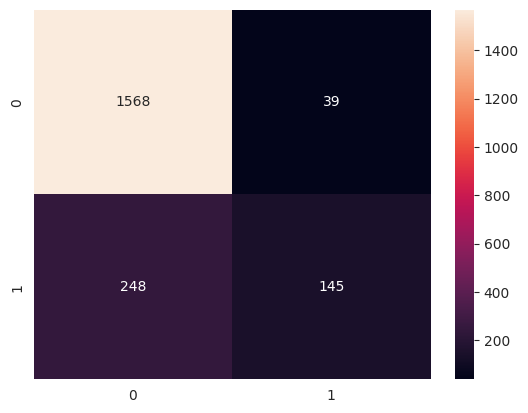

In [296]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True, fmt='d')

In [297]:
# Random Forest
rf_clf = RandomForestClassifier()
grid_params = {
    'max_depth': range(1, 10, 2),
    'n_estimators': range(5, 25, 5),
}

rf_clf = GridSearchCV(estimator = rf_clf,
                     param_grid=grid_params,
                     cv=2)

rf_clf.fit(X_train_scaled,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(1, 10, 2),
                         'n_estimators': range(5, 25, 5)})

In [298]:
y_pred = rf_clf.predict(X_test_scaled)
acc = metrics.accuracy_score(y_test, y_pred)
acc

0.8535

In [299]:
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))

[[1569   38]
 [ 255  138]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.91      1607
           1       0.78      0.35      0.49       393

    accuracy                           0.85      2000
   macro avg       0.82      0.66      0.70      2000
weighted avg       0.85      0.85      0.83      2000



<Axes: >

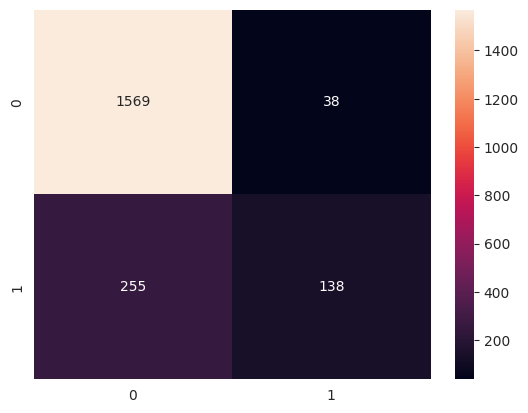

In [300]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True, fmt='d')

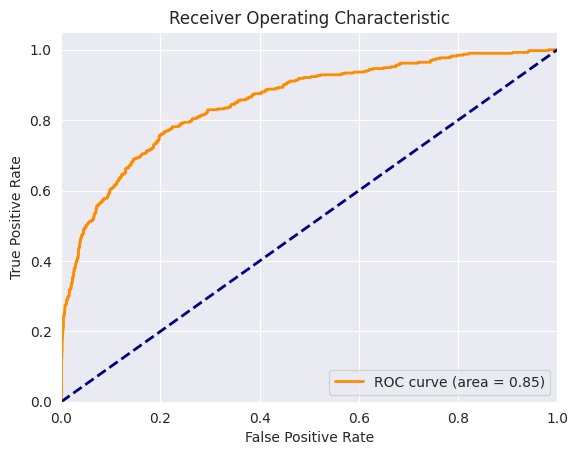

In [301]:
y_scores = rf_clf.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_scores)
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [302]:
# Bagging
knn = KNeighborsClassifier()
knn_clf = BaggingClassifier(estimator=knn,
                          n_estimators=10, random_state=42)

knn_clf.fit(X_train_scaled,y_train)

BaggingClassifier(estimator=KNeighborsClassifier(), random_state=42)

In [303]:
y_pred = knn_clf.predict(X_test_scaled)
acc = metrics.accuracy_score(y_test, y_pred)
acc

0.8305

In [304]:
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))

[[1521   86]
 [ 253  140]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1607
           1       0.62      0.36      0.45       393

    accuracy                           0.83      2000
   macro avg       0.74      0.65      0.68      2000
weighted avg       0.81      0.83      0.81      2000



<Axes: >

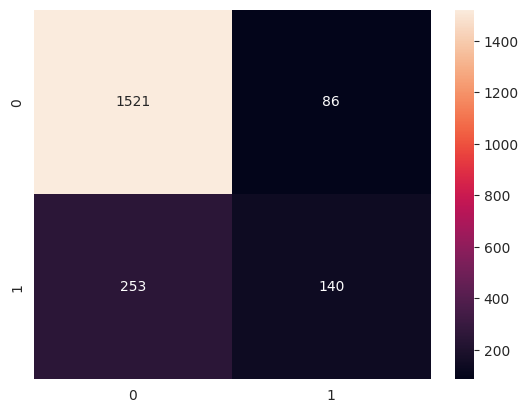

In [305]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True, fmt='d')

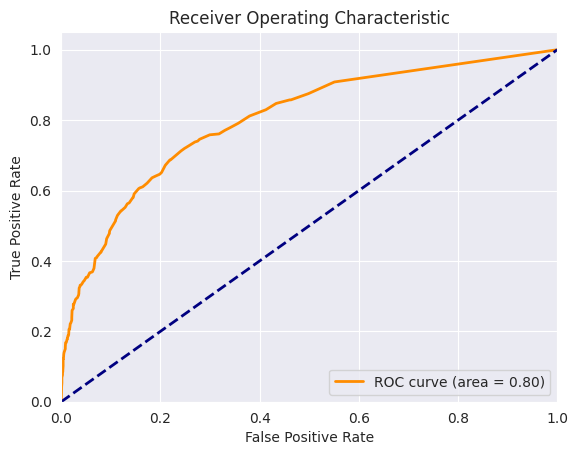

In [306]:
y_scores = knn_clf.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_scores)
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [307]:
# Adaboost
adab_clf = AdaBoostClassifier(n_estimators=50, random_state=42)
adab_clf.fit(X_train_scaled,y_train)
# adab_clf.fit(X_train_resampled_rescaled,y_train_resampled)

AdaBoostClassifier(random_state=42)

In [308]:
y_pred = adab_clf.predict(X_test_scaled)
acc = metrics.accuracy_score(y_test, y_pred)
acc

0.8585

In [309]:
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))

[[1533   74]
 [ 209  184]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1607
           1       0.71      0.47      0.57       393

    accuracy                           0.86      2000
   macro avg       0.80      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



<Axes: >

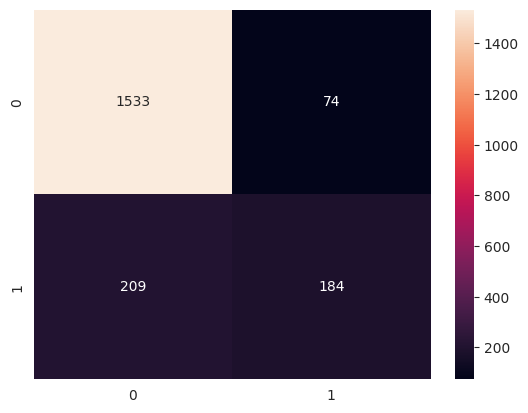

In [310]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True, fmt='d')

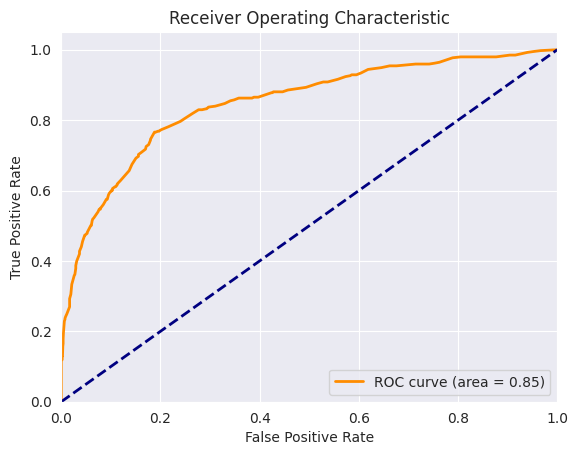

In [311]:
y_scores = adab_clf.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_scores)
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [312]:
# Gradient boosting
grb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
grb_clf.fit(X_train_scaled,y_train)
# grb_clf.fit(X_train_resampled_rescaled,y_train_resampled)

GradientBoostingClassifier(random_state=42)

In [313]:
y_pred = grb_clf.predict(X_test_scaled)
acc = metrics.accuracy_score(y_test, y_pred)
acc

0.864

In [314]:
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))

[[1548   59]
 [ 213  180]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.46      0.57       393

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



<Axes: >

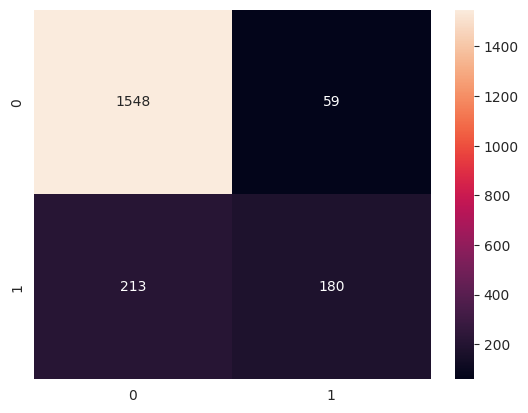

In [277]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True, fmt='d')

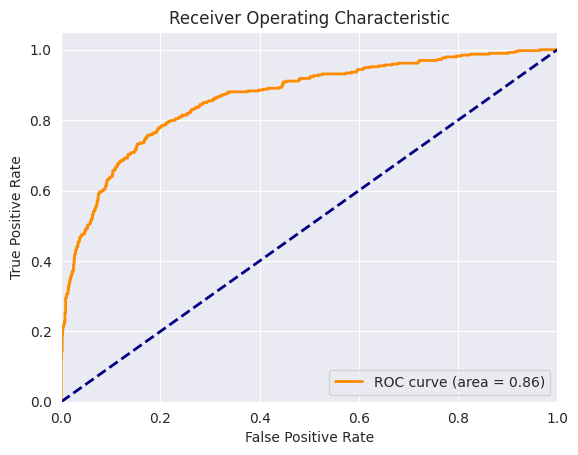

In [320]:
y_scores = grb_clf.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_scores)
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [325]:
# LGBM
lgb_clf = LGBMClassifier(
    learning_rate = 0.1,
    max_depth = 10,
    n_estimators = 150,
    random_state=42)
lgb_clf.fit(X_train_scaled,y_train)
# lgb_clf.fit(X_train_resampled_rescaled,y_train_resampled)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.


[LightGBM] [Info] Number of positive: 1644, number of negative: 6356
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000578 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1096
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.205500 -> initscore=-1.352267
[LightGBM] [Info] Start training from score -1.352267
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.


LGBMClassifier(max_depth=10, n_estimators=150, random_state=42)

In [326]:
y_pred = lgb_clf.predict(X_test_scaled)
acc = metrics.accuracy_score(y_test, y_pred)
acc

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.


0.8605

In [327]:
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))

[[1533   74]
 [ 205  188]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1607
           1       0.72      0.48      0.57       393

    accuracy                           0.86      2000
   macro avg       0.80      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



<Axes: >

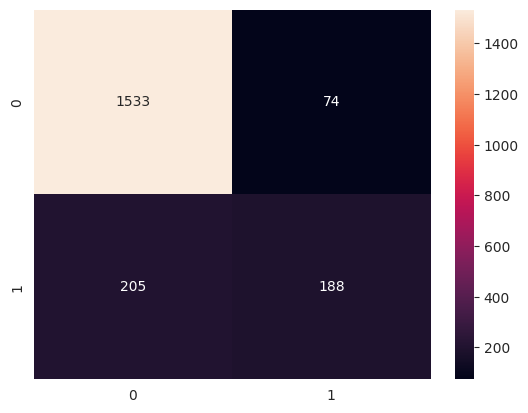

In [328]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True, fmt='d')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.


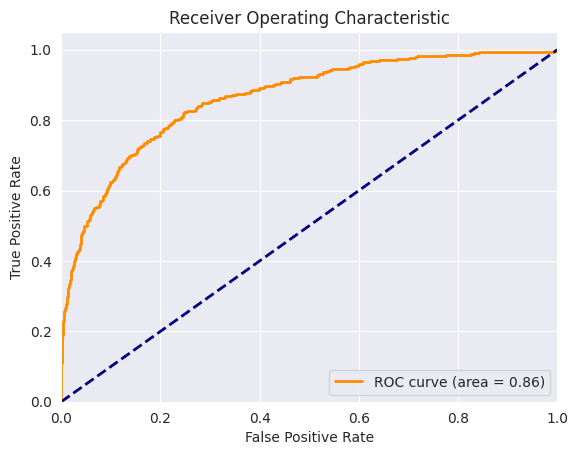

In [319]:
y_scores = lgb_clf.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_scores)
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [278]:
# Stacking
stacking_clf = StackingClassifier(
estimators=[
		 ('lr', LogisticRegression(random_state=42)),
		 ('rf', RandomForestClassifier(random_state=42)),
		 ('svc', SVC(probability=True, random_state=42))
		], final_estimator=RandomForestClassifier(random_state=43), cv=5
								)
# number of cross-validation folds
stacking_clf.fit(X_train_scaled, y_train)
# stacking_clf.fit(X_train_resampled_rescaled, y_train_resampled)


StackingClassifier(cv=5,
                   estimators=[('lr', LogisticRegression(random_state=42)),
                               ('rf', RandomForestClassifier(random_state=42)),
                               ('svc', SVC(probability=True, random_state=42))],
                   final_estimator=RandomForestClassifier(random_state=43))

In [279]:
y_pred = stacking_clf.predict(X_test_scaled)
acc = metrics.accuracy_score(y_test, y_pred)
acc

0.8415

In [280]:
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))

[[1511   96]
 [ 221  172]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.91      1607
           1       0.64      0.44      0.52       393

    accuracy                           0.84      2000
   macro avg       0.76      0.69      0.71      2000
weighted avg       0.83      0.84      0.83      2000



<Axes: >

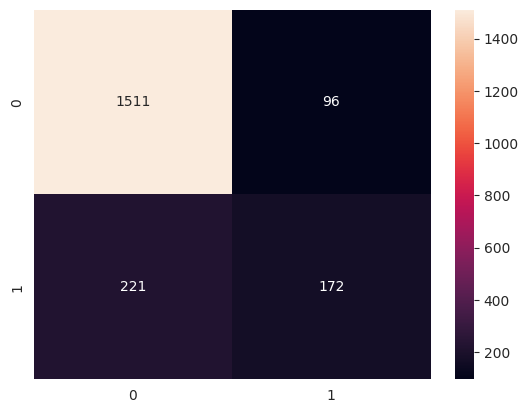

In [281]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True, fmt='d')

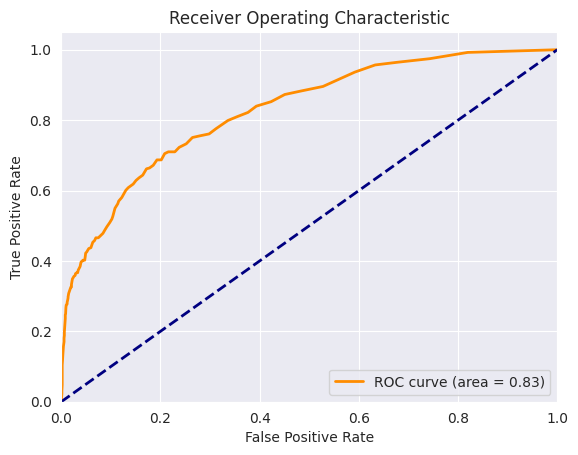

In [282]:
y_scores = stacking_clf.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_scores)
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.


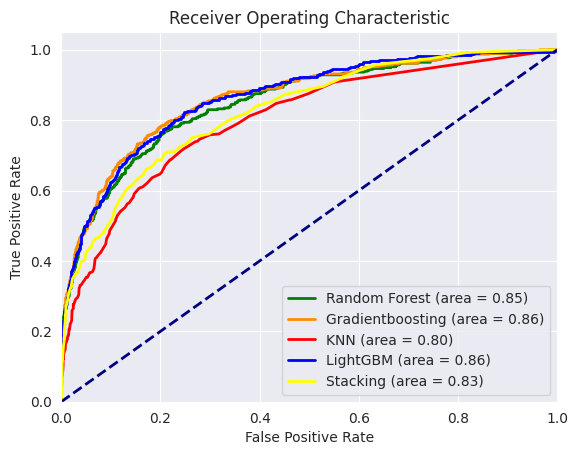

In [322]:
# Get predicted probabilities for the positive class
y_scores_rf = rf_clf.predict_proba(X_test_scaled)[:, 1]

y_scores_grb = grb_clf.predict_proba(X_test_scaled)[:, 1]

y_scores_knn = knn_clf.predict_proba(X_test_scaled)[:, 1]

y_scores_lgb = lgb_clf.predict_proba(X_test_scaled)[:, 1]

y_scores_stacking = stacking_clf.predict_proba(X_test_scaled)[:, 1]


# Compute ROC curve and AUC
fpr_rf, tpr_rf, _ = metrics.roc_curve(y_test, y_scores_rf)
roc_auc_rf = metrics.auc(fpr_rf, tpr_rf)

fpr_grb, tpr_grb, _ = metrics.roc_curve(y_test, y_scores_grb)
roc_auc_grb = metrics.auc(fpr_grb, tpr_grb)

fpr_knn, tpr_knn, _ = metrics.roc_curve(y_test, y_scores_knn)
roc_auc_knn = metrics.auc(fpr_knn, tpr_knn)

fpr_lgb, tpr_lgb, _ = metrics.roc_curve(y_test, y_scores_lgb)
roc_auc_lgb = metrics.auc(fpr_lgb, tpr_lgb)


fpr_stk, tpr_stk, _ = metrics.roc_curve(y_test, y_scores_stacking)
roc_auc_stk = metrics.auc(fpr_stk, tpr_stk)


# Plot the ROC curves
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (area = {roc_auc_rf:.2f})')
plt.plot(fpr_grb, tpr_grb, color='darkorange', lw=2, label=f'Gradientboosting (area = {roc_auc_grb:.2f})')
plt.plot(fpr_knn, tpr_knn, color='red', lw=2, label=f'KNN (area = {roc_auc_knn:.2f})')
plt.plot(fpr_lgb, tpr_lgb, color='blue', lw=2, label=f'LightGBM (area = {roc_auc_lgb:.2f})')
plt.plot(fpr_stk, tpr_stk, color='yellow', lw=2, label=f'Stacking (area = {roc_auc_stk:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()